# Live Coding Session 1
### Installation
#### Terminal
```bash
git clone https://github.com/libklein/mfms-ss21
cd mfms-ss
pip install -r requirements.txt
jupyter notebook
```

#### PyCharm
```bash
Download git repo
Open project in pycharm
```

#### [Binder](https://github.com/libklein/mfms-ss21)

## Live Coding Session 1 - Agenda

#### NetworkX
* Concepts
* Working with graphs
* Handling Data

#### OSMnX
* Concepts
* Fetching geometry
* Generating street networks
* Routing

#### Implementation: diet aware routing

# NetworkX

> NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

* Provides classes that let us treat graphs as high-level python objects
* Implements many well-known algorithms on top of these
    * Shortest-path
    * Network flow
    * Clustering
    * ... and many more
* Visualization using matplotlib
* (Advanced) network analysis
* Tools for (de-)serialization

## NetworkX - Concepts

Picture of graph from VL

Picture of Graph

| Networkx Class | Type       | Self-loops allowed | Parallel edges allowed |
| :- | :-: | :-: | :-: |
| `Graph()`          | undirected | Yes                | No                     |
| `DiGraph()`        | directed   | Yes                | No                     |
| `MultiGraph()`     | undirected | Yes                | Yes                    |
| `MultiDiGraph()`   | directed   | Yes                | Yes                    |

*Ordered* versions of these exist.

## Working with graphs

In [1]:
import networkx as nx

### Creation

In [2]:
# Create an empty graph
G = nx.Graph()

#### Nodes

In [3]:
# Add some nodes
G.add_node('Max')
# Add nodes from iterable
G.add_nodes_from(['Gerhard', 'Patrick', 'Marianne'])
# Can be any hashable (https://docs.python.org/3/glossary.html#term-hashable) type
mfms_team = frozenset(['Patrick', 'Gerhard', 'Max', 'Marianne'])
G.add_node(mfms_team)
# Type dynamically
G.add_node('Max')
print(G.nodes)

['Max', 'Gerhard', 'Patrick', 'Marianne', frozenset({'Max', 'Patrick', 'Marianne', 'Gerhard'})]


#### Edges

In [4]:
G.add_edge('Patrick', 'Max')
G.add_edges_from([('Max', 'Marianne'), ('Gerhard', 'Marianne'), ('Max', 'Gerhard')])

print(G.edges)

[('Max', 'Patrick'), ('Max', 'Marianne'), ('Max', 'Gerhard'), ('Gerhard', 'Marianne')]
['Max', 'Gerhard', 'Patrick', 'Marianne', frozenset({'Max', 'Patrick', 'Marianne', 'Gerhard'}), 2] [('Max', 'Patrick'), ('Max', 'Marianne'), ('Max', 'Gerhard'), ('Gerhard', 'Marianne')]


In [ ]:
# Type dynamically
# Be careful: Non-existent nodes are added automatically
G.add_edge(1, 2)
G.remove_node(1)
print(G.nodes, G.edges)
G.remove_node(2)
G.remove_node(mfms_team)

## Working with graphs

### Displaying graphs

Info gives a nice overview on the graph:

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


For small graphs, drawing works well too:

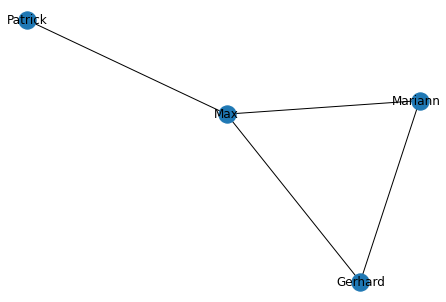

In [6]:
nx.draw(G, with_labels=True)

### Accessing elements

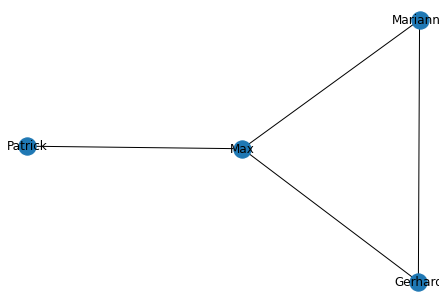

In [7]:
nx.draw(G, with_labels=True)

In [8]:
# G.nodes, G.edges, G.adj and G.degree
print('Nodes of G:', G.nodes) # "View" of nodes
print('Edges of G:', G.edges) # "View" of edges
print('Adjacency lists of nodes: ', G.adj)
print('Neighborhood', list(G.neighbors('Patrick')), 'vs Adjacency', G.adj['Patrick'])
print('Degrees of nodes in G: ', G.degree, '<=>', [(node, len(neighbors)) for node, neighbors in G.adj.items()])

Nodes of G: ['Max', 'Gerhard', 'Patrick', 'Marianne']
Edges of G: [('Max', 'Patrick'), ('Max', 'Marianne'), ('Max', 'Gerhard'), ('Gerhard', 'Marianne')]
Adjacency lists of nodes:  {'Max': {'Patrick': {}, 'Marianne': {}, 'Gerhard': {}}, 'Gerhard': {'Marianne': {}, 'Max': {}}, 'Patrick': {'Max': {}}, 'Marianne': {'Max': {}, 'Gerhard': {}}}
Neighborhood ['Max'] vs Adjacency {'Max': {}}
Degrees of nodes in G:  [('Max', 3), ('Gerhard', 2), ('Patrick', 1), ('Marianne', 2)] <=> [('Max', 3), ('Gerhard', 2), ('Patrick', 1), ('Marianne', 2)]


In [9]:
# Look like lists, but behave like dictionaries
print(G.nodes['Patrick'])
print(G.edges['Patrick', 'Max'])

{}
{}


In [10]:
# For example, integer indices wont work. Unless we've added an appropiate edge.
print(G.nodes[0])

KeyError: 0

## Handling data

We can store data on nodes and edges by setting ***attributes***.

In [11]:
# Store role=Lecturer on node Max
G.nodes['Max']['role'] = 'Lecturer'
print(G.nodes['Max'])

# Add value 'supervises' to key 'relationship' of edge dict.
G.edges['Max', 'Patrick']['relationship'] = 'supervises'
print(G.edges['Max', 'Patrick'])

{'role': 'Lecturer'}
{'relationship': 'supervises'}


=> We can think of ***Attributes*** as dictionaries kept along nodes and edges.

In [12]:
# Data can also be accessed through views
print(G.adj['Max'])
print(G.nodes(data=True))
print(G.nodes('role'))
print(G.edges(data=True))

{'Patrick': {'relationship': 'supervises'}, 'Marianne': {}, 'Gerhard': {}}
[('Max', {'role': 'Lecturer'}), ('Gerhard', {}), ('Patrick', {}), ('Marianne', {})]
[('Max', 'Lecturer'), ('Gerhard', None), ('Patrick', None), ('Marianne', None)]
[('Max', 'Patrick', {'relationship': 'supervises'}), ('Max', 'Marianne', {}), ('Max', 'Gerhard', {}), ('Gerhard', 'Marianne', {})]


In [13]:
# Set role for everyone except max to "Assistant"
for node, data in G.nodes(data=True):
    if node != 'Max':
        data['role'] = 'Tutor'
        
print(G.nodes(data=True))

[('Max', {'role': 'Lecturer'}), ('Gerhard', {'role': 'Tutor'}), ('Patrick', {'role': 'Tutor'}), ('Marianne', {'role': 'Tutor'})]
